In [56]:
import warnings
warnings.filterwarnings("ignore")

# Individual homework

* Please go through my Python files for lectures 3 and 4 first so that you know how to do the assignment.

## Throughput

* Consider the dataset throughput.csv on the course website. The response variable y is the numerical number Y, the throughput rate of a specific machine–product combination in one of the assembly and testing process steps. The features are 5 categorical machine and product attributes (X1 to X5) and 11 numerical attributes (X6 to X16) used to predict the throughput. 

* Read the file throughput.csv and denote the dataframe by throughput. 
    * Data Source: https://ieee-dataport.org/open-access/dataset-semiconductor-assembly-and-testing-processes
* Problems (a) to (g) are in lecture 3. After that, they are in lecture 4.

* We will use 11 numerical features to predict y. We provide the reference code HW2_ref_code.ipynb under the homework directory and its corresponding procedure to help you understand the whole machine learning process. 
    * You need to study the lecture note, code, and the book to become a machine learning software engineer. 

In [57]:
import pandas as pd 

In [58]:
df = pd.read_csv("throughput.csv")
df.head(2)

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
0,1546.836248,X1-1,X2-1,X3-1,X4-1,X5-1,0.025286,50,48,105,3.0,2.0,0.45,8,1600,8,0.8
1,1261.722593,X1-1,X2-1,X3-1,X4-1,X5-1,0.034876,67,34,105,3.0,2.0,0.45,8,1600,10,0.8


# 1(a)

* Please use the functions min() and max() of Pandas to understand the ranges for each column.
    * For any dataframe, we could apply any functions provided by Pandas to the dataframe.
    * https://pandas.pydata.org/docs/reference/frame.html

In [59]:
df.describe().min()

Y       0.340952
X6      0.000085
X7     19.000000
X8     19.000000
X9     50.000000
X10     2.000000
X11     2.000000
X12     0.253196
X13     8.000000
X14     4.000000
X15     4.000000
X16     0.079953
dtype: float64

In [60]:
df.describe().max()

Y      13186.0
X6     13186.0
X7     13186.0
X8     13186.0
X9     13186.0
X10    13186.0
X11    13186.0
X12    13186.0
X13    13186.0
X14    13186.0
X15    13186.0
X16    13186.0
dtype: float64

## Q: 

* Do they match the output of the function describe() for throughput?

In [61]:
df.describe()

,Y,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
count,13186.000000,13186.000000,13186.000000,13186.000000,13186.000000,13186.000000,13186.000000,13186.000000,13186.000000,13186.000000,13186.000000,13186.000000
mean,497.000309,0.197351,175.935917,185.208099,175.531549,7.830180,10.080279,1.015535,68.586910,352.025709,72.808357,0.711702
std,461.172149,0.305085,98.593193,103.492213,61.905685,3.254582,4.369881,0.253196,46.765912,511.594903,50.298174,0.079953
min,0.340952,0.000085,19.000000,19.000000,50.000000,2.000000,2.000000,0.400000,8.000000,4.000000,4.000000,0.600000
25%,209.632258,0.056652,115.000000,93.000000,125.000000,6.000000,8.000000,0.850000,16.000000,125.000000,20.000000,0.700000
50%,303.081295,0.108210,159.000000,179.000000,178.000000,8.000000,11.000000,1.200000,78.000000,140.000000,82.000000,0.700000
75%,524.021492,0.223042,212.000000,247.000000,203.000000,9.000000,13.000000,1.200000,96.000000,216.000000,93.000000,0.800000
max,2368.759625,14.217285,561.000000,545.000000,750.000000,40.000000,40.000000,2.020000,391.000000,2400.000000,384.000000,1.200000


# 1 (b)

* Please use the function info() of Pandas to understand the number of elements for each Column.
* What is the number of missing data for each feature by observing the number of each Column? 

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13186 entries, 0 to 13185
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       13186 non-null  float64
 1   X1      13186 non-null  object 
 2   X2      13186 non-null  object 
 3   X3      13186 non-null  object 
 4   X4      13185 non-null  object 
 5   X5      13186 non-null  object 
 6   X6      13186 non-null  float64
 7   X7      13186 non-null  int64  
 8   X8      13186 non-null  int64  
 9   X9      13186 non-null  int64  
 10  X10     13186 non-null  float64
 11  X11     13186 non-null  float64
 12  X12     13186 non-null  float64
 13  X13     13186 non-null  int64  
 14  X14     13186 non-null  int64  
 15  X15     13186 non-null  int64  
 16  X16     13186 non-null  float64
dtypes: float64(6), int64(6), object(5)
memory usage: 1.7+ MB


In [63]:
print(df.count()) 
print('difference ', df.count().max() - df.count().min())

Y      13186
X1     13186
X2     13186
X3     13186
X4     13185
X5     13186
X6     13186
X7     13186
X8     13186
X9     13186
X10    13186
X11    13186
X12    13186
X13    13186
X14    13186
X15    13186
X16    13186
dtype: int64
difference  1


# 1(c)

* If the proportions of missing data are small, we could use the command dropna() to drop them.
    * na: Not available

In [64]:
throughput = df.dropna()

# 1 (d)

* Please use the command info() again to see its effect. What happen to those missing data rows if they exist before?

In [65]:
throughput.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13185 entries, 0 to 13185
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       13185 non-null  float64
 1   X1      13185 non-null  object 
 2   X2      13185 non-null  object 
 3   X3      13185 non-null  object 
 4   X4      13185 non-null  object 
 5   X5      13185 non-null  object 
 6   X6      13185 non-null  float64
 7   X7      13185 non-null  int64  
 8   X8      13185 non-null  int64  
 9   X9      13185 non-null  int64  
 10  X10     13185 non-null  float64
 11  X11     13185 non-null  float64
 12  X12     13185 non-null  float64
 13  X13     13185 non-null  int64  
 14  X14     13185 non-null  int64  
 15  X15     13185 non-null  int64  
 16  X16     13185 non-null  float64
dtypes: float64(6), int64(6), object(5)
memory usage: 1.8+ MB


# 1 (e)

* The first step in machine learning is to normalize the features X which are X6 to X16 (the last one), so we use the following commands to transform the numbers for each feature into [0, 1].
* Please read carefully the iloc command in lecture 3.
    * Please search iloc in my Python file for lecture 3.

In [66]:
throughput.iloc[:, 6:]

,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
0,0.025286,50,48,105,3.0,2.0,0.45,8,1600,8,0.8
1,0.034876,67,34,105,3.0,2.0,0.45,8,1600,10,0.8
2,0.079237,176,187,200,8.0,6.0,0.75,8,216,10,0.8
3,0.113288,176,187,200,8.0,6.0,0.75,8,216,10,0.8
4,0.113778,176,187,200,8.0,6.0,0.75,8,216,10,0.8
...,...,...,...,...,...,...,...,...,...,...,...
13181,0.149699,479,247,60,12.0,18.0,1.20,132,60,88,0.8
13182,0.300309,217,216,80,8.0,10.5,1.00,162,168,126,0.7
13183,0.300309,217,216,80,8.0,10.5,1.00,162,168,26,0.7
13184,0.154297,370,327,150,10.0,14.5,0.80,200,70,182,0.7


In [67]:
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()
X_scaled = ss.fit_transform(throughput.iloc[:, 6:])

In [68]:
X_scaled.shape 
# Please note that the total number of features you have should match the total number from X6 to X16 .

(13185, 11)

# 1(f)

* The above data X_scaled is a NumPy array. 
* Please use the functions max() and min() with appropriate axis of NumPy to verify that the range is indeed in [0, 1] for each feature. 
    * for google search result: <a href="https://www.google.com/search?q=axis+numpy&sxsrf=AJOqlzVFx5QMNkSLbffdqho5QGC5k8vVVw:1678088752184&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjlyebf58b9AhW1UfUHHUusCY0Q_AUoAXoECAEQAw&biw=1280&bih=577&dpr=1.5">axis NumPy</a>
    * More information about (NumPy or Pandas) axis: https://www.sharpsightlabs.com/blog/numpy-axes-explained/

In [69]:
X_scaled.max(axis=1), X_scaled.min(axis=1)

(array([0.66611018, 0.66611018, 0.33333333, ..., 0.40208877, 0.64760148,
        0.64760148]),
 array([0.        , 0.        , 0.        , ..., 0.02111697, 0.01084684,
        0.01150401]))

# 1(g)

* We wll obtain the dataframe data by combining X_scaled and Y as [X_scaled, y].
* We will use the 11 numerical features to predict a scalar column y in this individual homework, so X is X_scaled and Y is located at the first column. Please note that the index of Python starts from 0.

In [70]:
throughput.columns

Index(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16'],
      dtype='object')

## How to obtain the column we need by accessing appropriate indexes?

In [71]:
throughput.columns[ 6: ]

Index(['X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15',
       'X16'],
      dtype='object')

## Dataeframe for X_scaled

In [72]:
pd.DataFrame(X_scaled, columns = throughput.columns[ 6 :])

,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
0,0.001773,0.057196,0.055133,0.078571,0.026316,0.000000,0.030864,0.000000,0.666110,0.010526,0.333333
1,0.002447,0.088561,0.028517,0.078571,0.026316,0.000000,0.030864,0.000000,0.666110,0.015789,0.333333
2,0.005567,0.289668,0.319392,0.214286,0.157895,0.105263,0.216049,0.000000,0.088481,0.015789,0.333333
3,0.007962,0.289668,0.319392,0.214286,0.157895,0.105263,0.216049,0.000000,0.088481,0.015789,0.333333
4,0.007997,0.289668,0.319392,0.214286,0.157895,0.105263,0.216049,0.000000,0.088481,0.015789,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
13180,0.010523,0.848708,0.433460,0.014286,0.263158,0.421053,0.493827,0.323760,0.023372,0.221053,0.333333
13181,0.021117,0.365314,0.374525,0.042857,0.157895,0.223684,0.370370,0.402089,0.068447,0.321053,0.166667
13182,0.021117,0.365314,0.374525,0.042857,0.157895,0.223684,0.370370,0.402089,0.068447,0.057895,0.166667
13183,0.010847,0.647601,0.585551,0.142857,0.210526,0.328947,0.246914,0.501305,0.027546,0.468421,0.166667


## Dataeframe for Y

In [73]:
pd.DataFrame(throughput['Y'], columns = [throughput.columns[ 0 ]])

,Y
0,1546.836248
1,1261.722593
2,860.853275
3,887.356349
4,895.059756
...,...
13181,129.837472
13182,7.835104
13183,7.835104
13184,128.375469


In [74]:
throughput['Y'].shape, X_scaled.shape

((13185,), (13185, 11))

# Concatenate X_scaled and Y

* https://pandas.pydata.org/docs/reference/api/pandas.concat.html
* Axis = 0, 1? 
    * for google search result (A axis is the same for Pandas an NumPy): <a href="https://www.google.com/search?q=axis+numpy&sxsrf=AJOqlzVFx5QMNkSLbffdqho5QGC5k8vVVw:1678088752184&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjlyebf58b9AhW1UfUHHUusCY0Q_AUoAXoECAEQAw&biw=1280&bih=577&dpr=1.5">axis NumPy</a>

In [75]:
data = pd.concat([pd.DataFrame(X_scaled, columns = throughput.columns[ 6 :]), 
                  pd.DataFrame(throughput['Y'].values, columns = [throughput.columns[0]])], axis = 1) 
data.head(2) # See the result and make sure that the above command works!

,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,Y
0,0.001773,0.057196,0.055133,0.078571,0.026316,0.0,0.030864,0.0,0.66611,0.010526,0.333333,1546.836248
1,0.002447,0.088561,0.028517,0.078571,0.026316,0.0,0.030864,0.0,0.66611,0.015789,0.333333,1261.722593


In [76]:
data.shape

(13185, 12)

# 1(h)

* We then split the data into a training and a testing dataset with 75% and 25%, respectively, by modifying the function split_train_test in lecture 3 Python file.  
* Please use the parameters train_ratio = 0.75 and random_seed = 128.

In [77]:
import numpy as np
def split_train_test(data, train_ratio, random_seed):
    # to make this notebook's output identical at every run
    np.random.seed(random_seed)
    shuffled_indices = np.random.permutation(len(data))
    train_set_size = int(len(data) * train_ratio)
    # partition
    train_indices = shuffled_indices[:train_set_size]
    test_indices = shuffled_indices[train_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [78]:
train_data, test_data = split_train_test(data, 0.75 , 128 )

In [79]:
train_data.head(2)

,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,Y
1232,0.002395,0.073801,0.072243,0.091429,0.026316,0.000000,0.092593,0.000000,0.666110,0.015789,0.166667,1307.817487
2271,0.016920,0.164207,0.174905,0.291429,0.105263,0.105263,0.277778,0.073107,0.065109,0.100000,0.166667,398.908415


In [80]:
train_data.shape, train_data.shape[0]

((9888, 12), 9888)

In [81]:
test_data.shape

(3297, 12)

In [82]:
train_data.shape[0] + test_data.shape[0]

13185

In [83]:
throughput.shape[0]  

13185

# 1(i)

* We then use train_data to study its statistical properties in the following questions.
* Please use the function corr() in lecture 4 to find out the matrix of correlation coefficients corr_matrix for train_data.

In [84]:
corr_matrix = train_data.corr() 
print(corr_matrix)

           X6        X7        X8        X9       X10       X11       X12  \
X6   1.000000  0.018762 -0.134181 -0.042729  0.357182  0.166759  0.164090   
X7   0.018762  1.000000  0.590991 -0.036867  0.518666  0.722287  0.528802   
X8  -0.134181  0.590991  1.000000  0.248652  0.235019  0.585305  0.543090   
X9  -0.042729 -0.036867  0.248652  1.000000  0.057629  0.199473  0.351492   
X10  0.357182  0.518666  0.235019  0.057629  1.000000  0.769093  0.549801   
X11  0.166759  0.722287  0.585305  0.199473  0.769093  1.000000  0.765718   
X12  0.164090  0.528802  0.543090  0.351492  0.549801  0.765718  1.000000   
X13  0.297680  0.563607  0.476013  0.030527  0.380147  0.672183  0.681071   
X14 -0.234916 -0.537753 -0.515278 -0.174384 -0.686586 -0.768959 -0.706749   
X15  0.330360  0.491966  0.362986  0.058932  0.637129  0.694751  0.536497   
X16  0.064682 -0.270442 -0.328241 -0.070832  0.071704 -0.122963 -0.112770   
Y   -0.376066 -0.520050 -0.448213 -0.179513 -0.667452 -0.747957 -0.607864   

# 1(j) 

* For the above matrix corr_matrix, we will choose the column Y and sort its correlation coefficients in decreasing order in terms of its absolute value.
    * https://numpy.org/doc/stable/reference/generated/numpy.argsort.html

In [85]:
corr_matrix[ "Y" ]

X6    -0.376066
X7    -0.520050
X8    -0.448213
X9    -0.179513
X10   -0.667452
X11   -0.747957
X12   -0.607864
X13   -0.640153
X14    0.709622
X15   -0.709226
X16    0.054002
Y      1.000000
Name: Y, dtype: float64

In [86]:
import numpy as np
Y_corr = corr_matrix[ "Y" ][ (-np.abs(corr_matrix[ "Y" ])).argsort() ] 
Y_corr

Y      1.000000
X11   -0.747957
X14    0.709622
X15   -0.709226
X10   -0.667452
X13   -0.640153
X12   -0.607864
X7    -0.520050
X8    -0.448213
X6    -0.376066
X9    -0.179513
X16    0.054002
Name: Y, dtype: float64

## 1(k)

* Please plot the scatter_matrix for each pair of features with respect to Y.

In [87]:
Y_corr.index

Index(['Y', 'X11', 'X14', 'X15', 'X10', 'X13', 'X12', 'X7', 'X8', 'X6', 'X9',
       'X16'],
      dtype='object')

In [88]:
len(Y_corr.index)

12

In [89]:
[Y_corr.index[0] , Y_corr.index[1], Y_corr.index[2]]

['Y', 'X11', 'X14']

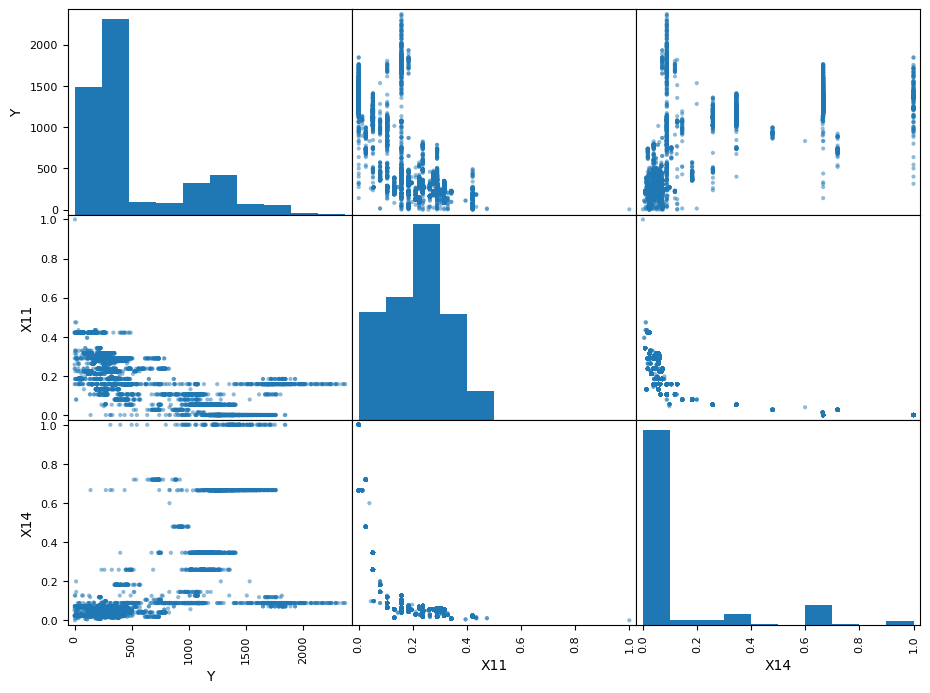

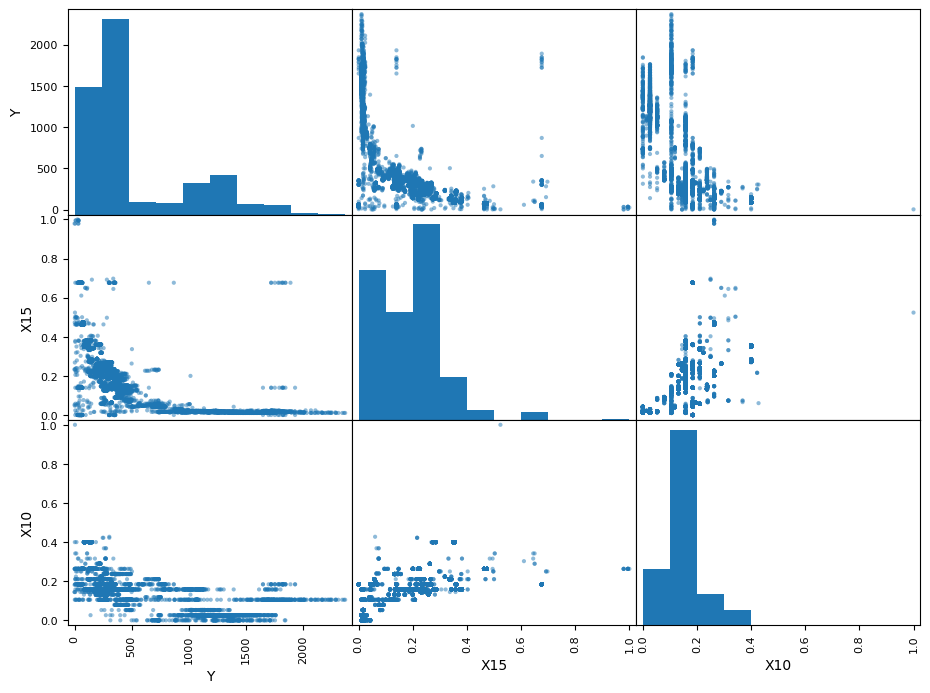

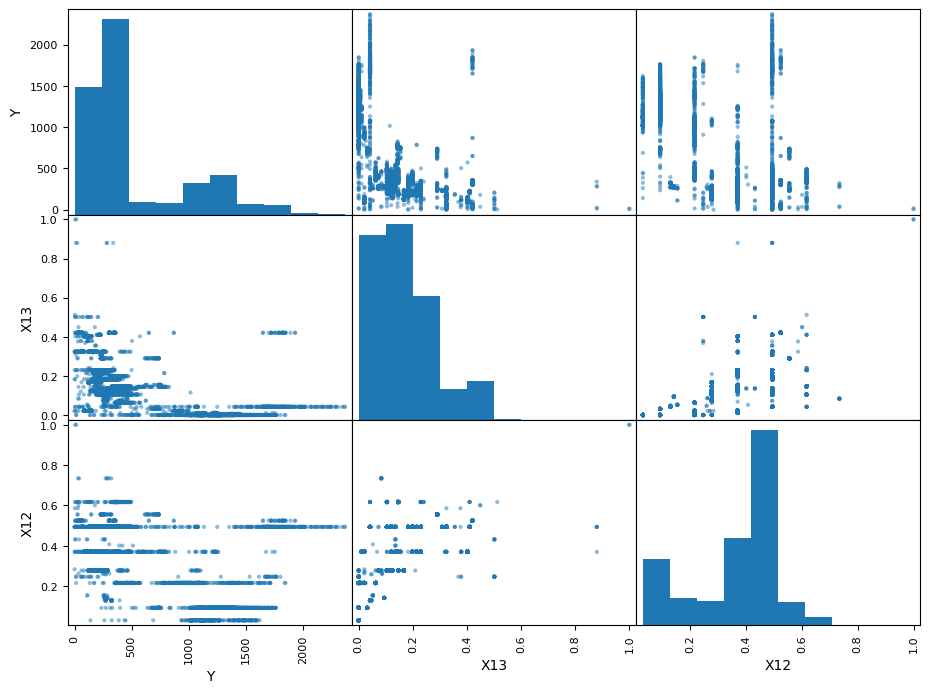

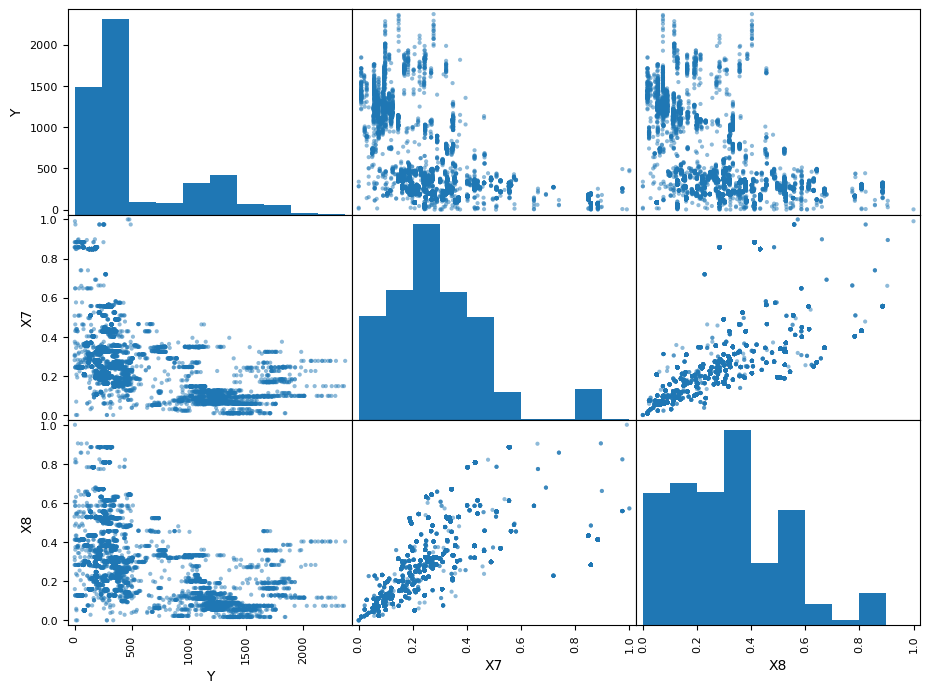

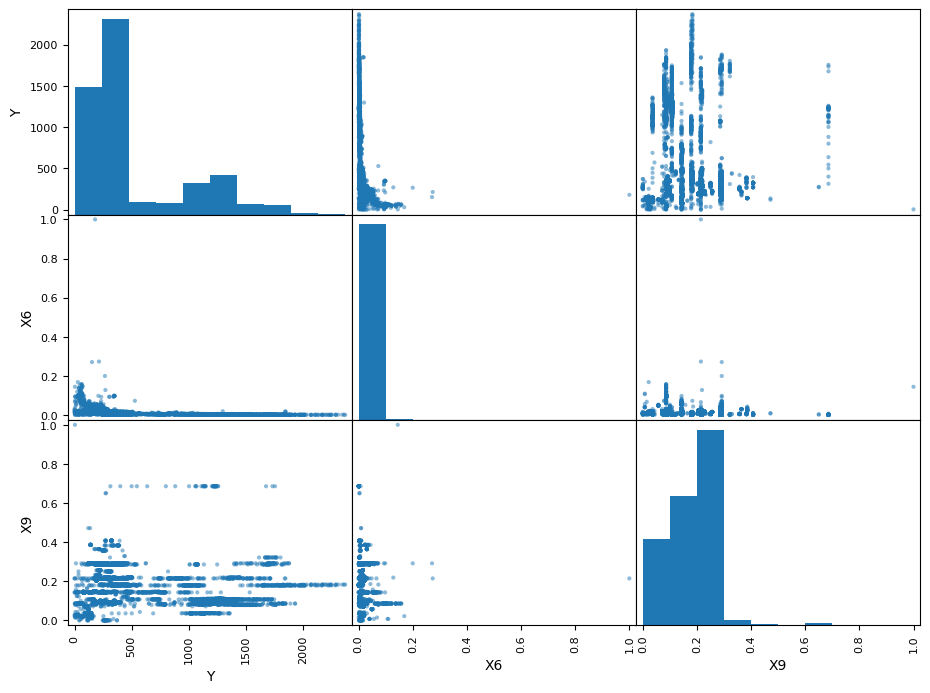

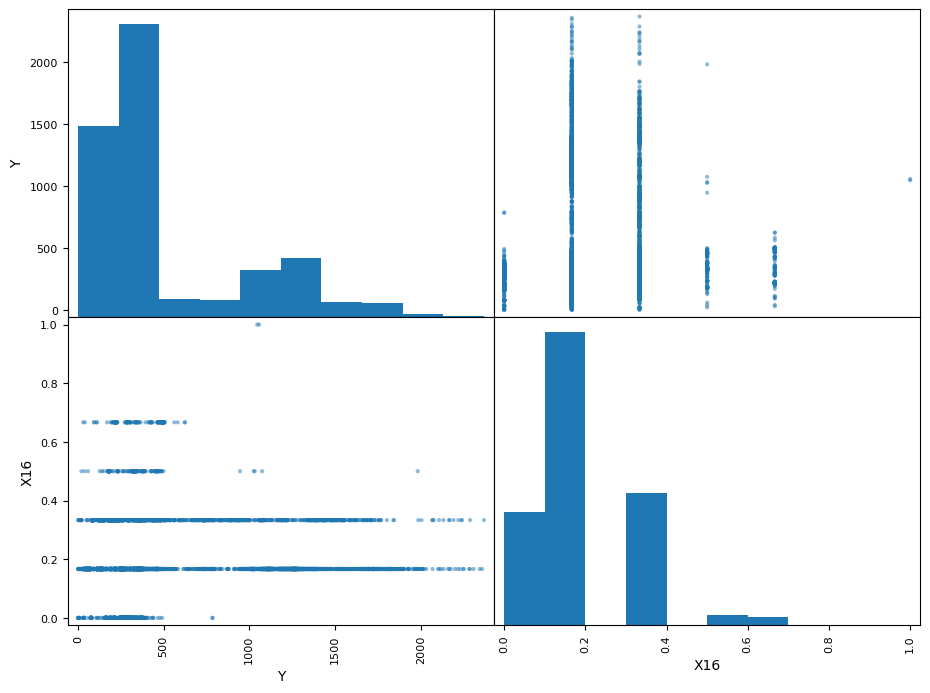

In [90]:
import os 
import matplotlib.pyplot as plt
from pandas.plotting  import scatter_matrix
if not os.path.exists('HW2_output'): # if the directory HW2_output does not exist
    os.makedirs('HW2_output')        # will make (create) a new directory HW2_output

for i in range( len(Y_corr.index) // 2  ): # We will choose 2 features in each iteration. 
    if 2*i+2 >= len(Y_corr.index): # In case that the total number of features is an odd number.
        scatter_matrix(train_data[ [Y_corr.index[0], Y_corr.index[ 2*i+1 ]]], figsize=(11, 8))
    else: # choose 2 features
        scatter_matrix(train_data[ [Y_corr.index[0], Y_corr.index[ 2*i+1 ], Y_corr.index[ 2*i+2 ]]], figsize=(11, 8))
        
    plt.savefig("HW2_output/scatter_matrix_plot" + str(i+1))
    plt.show()
    plt.close('all') # close all pictures

## 1(l)

* Linear regression model 

In [91]:
X_train = train_data.iloc[:, : 11]
X_train 

,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
1232,0.002395,0.073801,0.072243,0.091429,0.026316,0.000000,0.092593,0.000000,0.666110,0.015789,0.166667
2271,0.016920,0.164207,0.174905,0.291429,0.105263,0.105263,0.277778,0.073107,0.065109,0.100000,0.166667
1455,0.002559,0.057196,0.077947,0.085714,0.026316,0.000000,0.092593,0.000000,0.666110,0.015789,0.166667
804,0.008010,0.289668,0.319392,0.214286,0.157895,0.105263,0.216049,0.000000,0.088481,0.015789,0.333333
10163,0.015305,0.311808,0.338403,0.255714,0.289474,0.342105,0.493827,0.409922,0.008347,0.263158,0.666667
...,...,...,...,...,...,...,...,...,...,...,...
6614,0.013613,0.269373,0.277567,0.291429,0.157895,0.276316,0.493827,0.198433,0.056761,0.213158,0.166667
9769,0.004067,0.077491,0.178707,0.145714,0.105263,0.157895,0.493827,0.104439,0.048414,0.123684,0.666667
3329,0.016484,0.280443,0.323194,0.214286,0.144737,0.302632,0.370370,0.229765,0.060935,0.231579,0.333333
8909,0.005508,0.221402,0.543726,0.285714,0.184211,0.289474,0.493827,0.229765,0.050501,0.234211,0.166667


In [92]:
Y_train = train_data.iloc[:, 11 ]
Y_train

1232     1307.817487
2271      398.908415
1455     1328.086955
804       839.862887
10163     216.578682
            ...     
6614      355.700211
9769      497.237564
3329      197.637850
8909      273.923047
5062     1197.085119
Name: Y, Length: 9888, dtype: float64

In [93]:
import statsmodels.api as sm
X_train = train_data.iloc[:, : 11]
Y_train = train_data.iloc[:, 11]
X_train_aug = sm.add_constant(X_train) # Add coefficients for the intercept to become augmented matrix
est = sm.OLS(Y_train, X_train_aug).fit() 
# Ordinary least squares (最小平方法)
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     2265.
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:07:09   Log-Likelihood:                -68466.
No. Observations:                9888   AIC:                         1.370e+05
Df Residuals:                    9876   BIC:                         1.370e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1022.4921     14.661     69.741      0.0

In [94]:
X_train_aug

,const,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
1232,1.0,0.002395,0.073801,0.072243,0.091429,0.026316,0.000000,0.092593,0.000000,0.666110,0.015789,0.166667
2271,1.0,0.016920,0.164207,0.174905,0.291429,0.105263,0.105263,0.277778,0.073107,0.065109,0.100000,0.166667
1455,1.0,0.002559,0.057196,0.077947,0.085714,0.026316,0.000000,0.092593,0.000000,0.666110,0.015789,0.166667
804,1.0,0.008010,0.289668,0.319392,0.214286,0.157895,0.105263,0.216049,0.000000,0.088481,0.015789,0.333333
10163,1.0,0.015305,0.311808,0.338403,0.255714,0.289474,0.342105,0.493827,0.409922,0.008347,0.263158,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...
6614,1.0,0.013613,0.269373,0.277567,0.291429,0.157895,0.276316,0.493827,0.198433,0.056761,0.213158,0.166667
9769,1.0,0.004067,0.077491,0.178707,0.145714,0.105263,0.157895,0.493827,0.104439,0.048414,0.123684,0.666667
3329,1.0,0.016484,0.280443,0.323194,0.214286,0.144737,0.302632,0.370370,0.229765,0.060935,0.231579,0.333333
8909,1.0,0.005508,0.221402,0.543726,0.285714,0.184211,0.289474,0.493827,0.229765,0.050501,0.234211,0.166667


In [95]:
est.pvalues   

const     0.000000e+00
X6        3.581625e-88
X7        5.564807e-01
X8        1.560189e-27
X9        3.933306e-69
X10       5.747370e-38
X11       3.510221e-24
X12       1.578148e-48
X13      6.236417e-106
X14      1.137587e-151
X15      1.039691e-157
X16       1.459132e-11
dtype: float64

In [96]:
throughput.columns[ :]

Index(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16'],
      dtype='object')

In [97]:
est.rsquared

0.7161082629542501

# 1(m)

* Find out the nonsignificant variables 

In [98]:
p_value_thres = 0.05 # threshold
nonsignificant = [] # A list of nonsignificant variables. It is empty initially.
significant = throughput.columns[ 6 :].tolist() # The initial significant variables
for i in range(len(throughput.columns[ 6 :])): 
    if est.pvalues[i+1] >= p_value_thres:
        # Add the nonsignificant variable to the list of nonsignificant variables
        nonsignificant.append(throughput.columns[ 6 +i]) 
        # Remove the nonsignificant variable out of the list of significant variables
        significant.remove(throughput.columns[ 6 +i])

print(nonsignificant, significant)

['X7'] ['X6', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16']


# 1(n)

* Drop nonsignificant variables once
    * To simplify the process, we drop all of the nonsignificant variables at once. 
    * The formal way is the backward elimination procedure described in the lecture note which is complex to program for initial programmer, so we use simpler approach to simplfiy your coding effort.

In [99]:
throughput.columns[ 6 :] 

Index(['X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15',
       'X16'],
      dtype='object')

In [100]:
X_train_signif = pd.DataFrame(X_train, columns = throughput.columns[ 6:]).drop(nonsignificant, axis = 1)
X_train_signif.head(2)

,X6,X8,X9,X10,X11,X12,X13,X14,X15,X16
1232,0.002395,0.072243,0.091429,0.026316,0.000000,0.092593,0.000000,0.666110,0.015789,0.166667
2271,0.016920,0.174905,0.291429,0.105263,0.105263,0.277778,0.073107,0.065109,0.100000,0.166667


In [101]:
X_train_signif.shape

(9888, 10)

In [102]:
from sklearn.linear_model import LinearRegression
  
lr = LinearRegression()
lr.fit(X_train_signif,Y_train)
# LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
#     normalize=False)

lr.score(X_train_signif,Y_train)

0.7160983210526781

In [103]:
X_train_signif = pd.DataFrame(X_train, columns = throughput.columns[6 :]).drop(nonsignificant, axis= 1)
X_train_signif = sm.add_constant(X_train_signif) # Add coefficients for the intercept
est_significant = sm.OLS(Y_train, X_train_signif.values).fit() 
# Ordinary least squares (最小平方法)
print( est_significant.summary() )

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     2491.
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:07:09   Log-Likelihood:                -68466.
No. Observations:                9888   AIC:                         1.370e+05
Df Residuals:                    9877   BIC:                         1.370e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1023.7594     14.501     70.597      0.0

# 1(o)

* Estimation linear equation

In [104]:
#significant = throughput.columns[6:].tolist()
output_eqn = 'y = '
for i in range(len(significant)+1): 
    if i == 0 :
        output_eqn += str( round(est_significant.params[i], 2)) 
    else:
        if est_significant.params[i] >= 0 :
            output_eqn += " + " + str( round(est_significant.params[i], 2) ) +  " * " + significant[i-1] + " " 
        else:
            output_eqn += " " + str( round(est_significant.params[i], 2) ) +  " * " + significant[i-1] 

output_eqn

'y = 1023.76 -2915.48 * X6 -210.79 * X8 -606.22 * X9 -810.46 * X10 -606.75 * X11 + 442.83 * X12  -836.81 * X13 + 545.3 * X14  -810.71 * X15 -140.86 * X16'

# 1(p)

* Use the trained model and the function "predict" to predict the output.
    * What is your observation?

In [105]:
Y_train

1232     1307.817487
2271      398.908415
1455     1328.086955
804       839.862887
10163     216.578682
            ...     
6614      355.700211
9769      497.237564
3329      197.637850
8909      273.923047
5062     1197.085119
Name: Y, Length: 9888, dtype: float64

In [106]:
Y_train.min(), Y_train.max()

(0.340952299, 2368.759625)

In [107]:
est_significant.predict( X_train_signif )

1232     1292.751186
2271      604.497586
1455     1294.534562
804       695.508787
10163    -116.435771
            ...     
6614      340.567075
9769      668.288912
3329      247.018912
8909      235.548711
5062     1279.668559
Length: 9888, dtype: float64

In [108]:
est_significant.predict(X_train_signif).min(),est_significant.predict(X_train_signif).max()

(-2495.5124487570743, 1470.390027928286)

# 1(q)
* Please read the webpage to compute R^2: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html 

In [109]:
# https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html?highlight=compute+rsquared
round(est_significant.rsquared, 4)

0.7161

In [110]:
from statsmodels.tools.eval_measures import rmse 
from sklearn.metrics import r2_score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
print('train RMSE: ', round(rmse( Y_train, est_significant.predict( X_train_signif ) ), 4)) 
print('train R^2: ', round(r2_score( Y_train, est_significant.predict( X_train_signif ) ), 4)) 


# Need to drop nonsignificant columns from test_data
X3_test = pd.DataFrame(test_data.iloc[:, : ], columns = throughput.columns[ 6:]).drop(nonsignificant, axis= 1)
X3_test = sm.add_constant(X3_test) # Add coefficients for the intercept
print('test RMSE: ',  round(rmse( test_data['Y'], est_significant.predict(X3_test) ), 4)) 
print('test R^2: ', round(r2_score( test_data['Y'], est_significant.predict(X3_test )), 4)) 

train RMSE:  245.9784
train R^2:  0.7161
test RMSE:  252.0665
test R^2:  0.6993
